# **LAB 6 : Regression Part 2**

In this Lab, we look into the shortcomings of Linear Regression and see how those problems can be solved using Logistic Regression. We shall also explore Polynomial Regression.

  1. Polynomial Regression
  2. Linear Regression on a specific pattern of data to observe shortcomings
  3. Logistic Regression to solve those problems
  4. Circularly Separated Data
  5. Multiclass Logistic Regression

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Polynomial Regression

1. Generate data using relation $y=0.25x^{3}+1.25x^{2}-3x-3$
2. Corrupt y by adding random noise (uniformly sampled)
3. Fit the generated curve using different polynomial order. (Using matrix inversion and gradient descent)

In [2]:
## Use the Regression class defined in the previous lab
class regression:
      # Constructor
  def __init__(self, name='reg'):
    self.name = name  # Create an instance variable

  def grad_update(self,w_old,lr,y,x):
    w = w_old + (2*lr/x.shape[1]) * (x @ (y - (x.T @ w_old)))
    return w

  def error(self,w,y,x):
    return np.mean(np.power((y - x.T @ w), 2))

  def mat_inv(self,y,x_aug):
    return np.linalg.pinv((x_aug @ x_aug.T)) @ x_aug @ y    # W_opt, basically
    
  # By Gradient descent

  def Regression_grad_des(self, x, y, lr, w_choose):
    err_arr = np.array([])
    if w_choose == 0:
      w_init = np.zeros((x.shape[0],1))
    else:
      # w_init = np.random.uniform(-2, 2, (x.shape[0],1))
      w_init = np.array([[0], [-3], [1], [0], [0]]) 
      # for degree 4, some local minima may exist for cost function, so we place initial point in a favourable location
      
    w_prev = w_init
    w_curr = w_init
    temp = 0
    for i in range(5000):
      
      w_curr = self.grad_update(w_curr, lr, y, x)
      err = self.error(w_curr, y, x)
      err_prev = self.error(w_prev, y, x)
      # err_arr.concatenate(err_arr, err)
      dev = np.abs(err - err_prev)
      w_prev = w_curr
      temp = err
      # print(err)
      if dev<=0.000001:
        break

    w_pred = w_curr
    # err_arr = np.concatenate(err_arr)
    # print(err_arr)
    # err = err_arr
    
    err = temp
    return w_pred, err



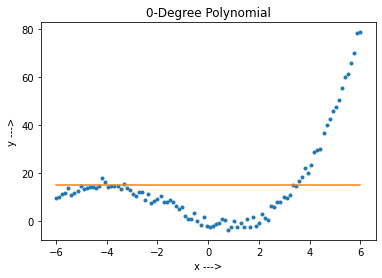

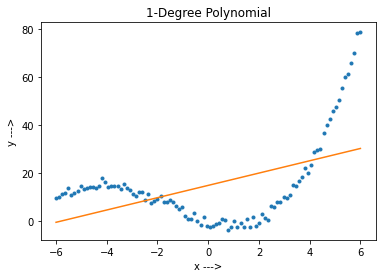

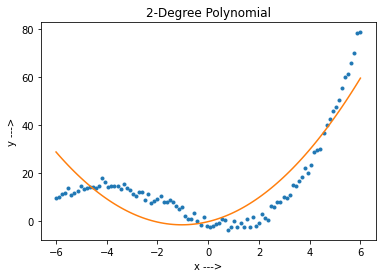

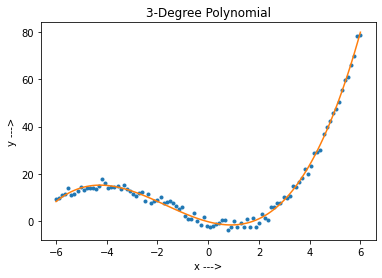

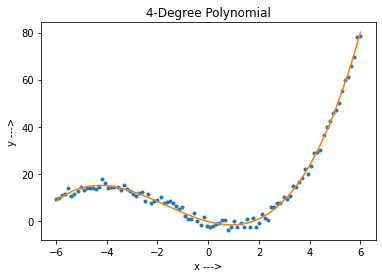

In [3]:
## Data generation

x=np.linspace(-6, 6, 100)
x=x[np.newaxis,:]

w = np.array([[-3], [-3], [1.25], [0.25]]) ## Define Weights as per the given equation

## Function to transform the data into polynomial
def data_transform(X,degree): 
  ## Write your code here
  X_new = []
  
  for i in range(degree+1):
    X_new.append(np.power(X, i)) # append X^i to list
    # print(X_new)
    # print(np.power(X,i))
  X_new = np.concatenate(X_new) # concat list of arrays
  return X_new


X = data_transform(x,3)
# print(X)
y = X.T @ w

y = y+5*np.random.uniform(0,1,y.shape)

# plt.plot(x.T,y,'.')

reg=regression()

# By computation

# Code for degree 0 polynomial fitting

degree = 0
X_0 = data_transform(x,degree)
w_mat=reg.mat_inv(y,X_0)
y_pred=X_0.T @ w_mat
plt.figure()
plt.plot(x.T,y,'.')
plt.plot(x.T,y_pred)
plt.title('0-Degree Polynomial')
plt.xlabel('x --->')
plt.ylabel('y --->')
plt.show()


# Write the code for degree 1 polynomial fitting

degree = 1
X_1 = data_transform(x,degree)
w_mat=reg.mat_inv(y,X_1)
y_pred=X_1.T @ w_mat
plt.figure()
plt.plot(x.T,y,'.')
plt.plot(x.T,y_pred)
plt.title('1-Degree Polynomial')
plt.xlabel('x --->')
plt.ylabel('y --->')
plt.show()

# Write the code for degree 2 polynomial fitting

degree = 2
X_2 = data_transform(x,degree)
w_mat=reg.mat_inv(y,X_2)
y_pred=X_2.T @ w_mat
plt.figure()
plt.plot(x.T,y,'.')
plt.plot(x.T,y_pred)
plt.title('2-Degree Polynomial')
plt.xlabel('x --->')
plt.ylabel('y --->')
plt.show()

# Write the code for degree 3 polynomial fitting

degree = 3
X_3 = data_transform(x,degree)
w_mat=reg.mat_inv(y,X_3)
y_pred=X_3.T @ w_mat
plt.figure()
plt.plot(x.T,y,'.')
plt.plot(x.T,y_pred)
plt.title('3-Degree Polynomial')
plt.xlabel('x --->')
plt.ylabel('y --->')
plt.show()

# Write the code for degree 4 polynomial fitting

degree = 4
X_4 = data_transform(x,degree)
w_mat=reg.mat_inv(y,X_4)
y_pred=X_4.T @ w_mat
plt.figure()
plt.plot(x.T,y,'.')
plt.plot(x.T,y_pred)
plt.title('4-Degree Polynomial')
plt.xlabel('x --->')
plt.ylabel('y --->')
plt.show()


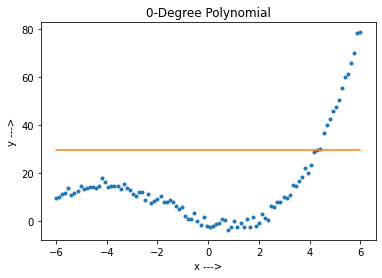

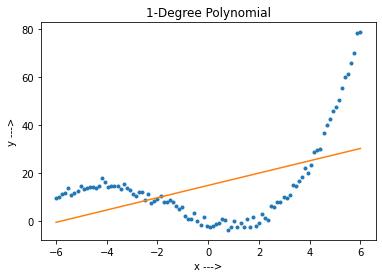

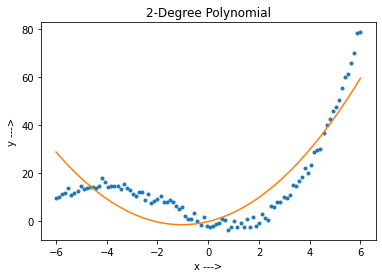

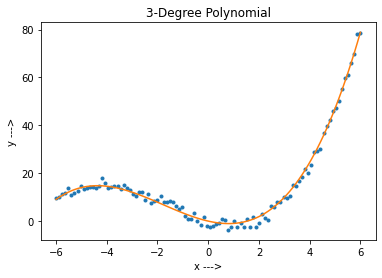

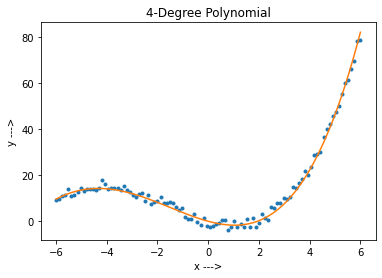

In [4]:
# By Gradient Descent 

## Write your code here

reg=regression()

# Code for degree 0 polynomial fitting

degree = 0
lr = 1
X_0 = data_transform(x,degree)
w_mat, _ = reg.Regression_grad_des(X_0, y, lr, 0)
# print(w_mat)
# print(X_0)
y_pred=X_0.T @ w_mat
plt.figure()
plt.plot(x.T,y,'.')
plt.plot(x.T,y_pred)
plt.title('0-Degree Polynomial')
plt.xlabel('x --->')
plt.ylabel('y --->')
plt.show()



# Write the code for degree 1 polynomial fitting

degree = 1
lr = 0.05
X_1 = data_transform(x,degree)
w_mat, _ = reg.Regression_grad_des(X_1, y, lr, 0)
# print(w_mat)
# print(X_1)
y_pred=X_1.T @ w_mat
plt.figure()
plt.plot(x.T,y,'.')
plt.plot(x.T,y_pred)
plt.title('1-Degree Polynomial')
plt.xlabel('x --->')
plt.ylabel('y --->')
plt.show()

# Write the code for degree 2 polynomial fitting

degree = 2
lr = 0.001
X_2 = data_transform(x,degree)
w_mat, _ = reg.Regression_grad_des(X_2, y, lr, 0)
# print(w_mat)
# print(X_2)
y_pred=X_2.T @ w_mat
plt.figure()
plt.plot(x.T,y,'.')
plt.plot(x.T,y_pred)
plt.title('2-Degree Polynomial')
plt.xlabel('x --->')
plt.ylabel('y --->')
plt.show()

# Write the code for degree 3 polynomial fitting

degree = 3
lr = 0.0001
X_3 = data_transform(x,degree)
w_mat, _ = reg.Regression_grad_des(X_3, y, lr, 0)
# print(w_mat)
# print(X_3)
y_pred=X_3.T @ w_mat
plt.figure()
plt.plot(x.T,y,'.')
plt.plot(x.T,y_pred)
plt.title('3-Degree Polynomial')
plt.xlabel('x --->')
plt.ylabel('y --->')
plt.show()

# Write the code for degree 4 polynomial fitting

degree = 4
lr = 0.00000075
X_4 = data_transform(x,degree)
w_mat, err = reg.Regression_grad_des(X_4, y, lr, 1)
# print(w_mat)
# print(X_4)
y_pred=X_4.T @ w_mat
plt.figure()
plt.plot(x.T,y,'.')
plt.plot(x.T,y_pred)
plt.title('4-Degree Polynomial')
plt.xlabel('x --->')
plt.ylabel('y --->')
plt.show()


# Linear Regression (Prelude to Drawbacks)

  Generate the data as shown in the figure below


(200,)


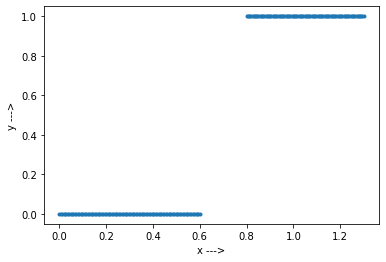

In [5]:
## Write your code here
x_low = np.linspace(0, 0.6, 100)
y_low = np.zeros(x_low.shape)
x_high = np.linspace(0.8, 1.3, 100)
y_high = np.ones(x_high.shape)

x = np.concatenate((x_low, x_high))
y = np.concatenate((y_low, y_high))

plt.figure()
print(x.shape)
plt.plot(x, y, '.')
plt.xlabel('x --->')
plt.ylabel('y --->')
plt.show()

  Use the Regression class defined in the previous lab to fit the curve

In [6]:
## Write your Code here
class linearRegression:
      # Contructor
  def __init__(self, name='linreg'):
    self.name = name  # Create an instance variable

  def grad_update(self,w_old,lr,y,x):
    w = w_old + (2*lr/x.shape[1]) * (x @ (y - (x.T @ w_old)))
    return w

  def error(self,w,y,x):
    return np.mean(np.power((y - x.T @ w), 2))

  def mat_inv(self,y,x_aug):
    return np.linalg.pinv((x_aug @ x_aug.T)) @ x_aug @ y    # W_opt, basically
    
  # By Gradient descent

  def Regression_grad_des(self, x, y, lr):
    err_arr = []
    w_init = np.zeros((x.shape[0],1))
    w_prev = w_init
    w_curr = w_init
    for i in range(5000):
      
      w_curr = self.grad_update(w_curr, lr, y, x)
      err = self.error(w_curr, y, x)
      err_prev = self.error(w_prev, y, x)
      # print("err = ", err)
      # print("err_arr = ", err_arr)
      err_arr.append(err)
      dev = np.abs(err - err_prev)
      w_prev = w_curr
      # print(err)
      if dev<=0.000001:
        break

    w_pred = w_curr
    # err_arr = np.concatenate(err_arr)
    # print(err_arr)
    err = err_arr
    return w_pred, err



  Augment the Data and generate optimal weights

In [7]:
## Write your Code here
x_new = x[:, np.newaxis].T
print(x_new.shape)                                     # x0, x1       # y
x_ones = np.ones((1, x_new.shape[1]))                  # [[1, 4],     # [[6],
x_aug = np.concatenate((x_ones, x_new))                # [1, 5],      # [7],
print(x_aug.shape)                                     # [1, 6],      # [9],
y_new = y[:, np.newaxis]                               #  ...  ]     #  ... ]

linreg = linearRegression()
w = linreg.mat_inv(y_new, x_aug)
print("Optimal Weights using Matrix inversion,\n w = \n", w)

linreg = linearRegression()
lr = 0.01
w, err_list = linreg.Regression_grad_des(x_aug, y_new, lr)
print("Optimal Weights using Gradient Descent,\n w = \n", w)


(1, 200)
(2, 200)
Optimal Weights using Matrix inversion,
 w = 
 [[-0.25988351]
 [ 1.12575335]]
Optimal Weights using Gradient Descent,
 w = 
 [[-0.23251286]
 [ 1.08967087]]


Using the optimal weights, fit the curve

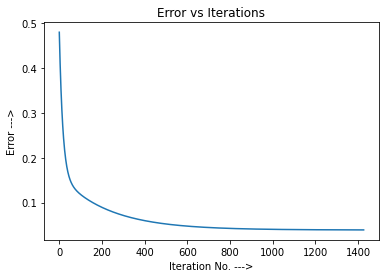

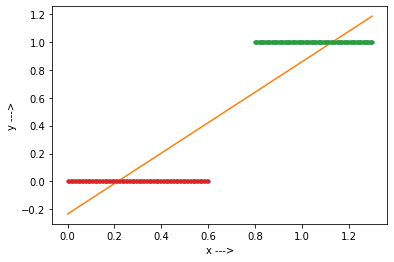

In [8]:
## Write your Code here
plt.figure()
plt.title('Error vs Iterations')
plt.xlabel('Iteration No. --->')
plt.ylabel('Error --->')
plt.plot(err_list)
plt.show()


y_out = x_aug.T @ w
# plt.figure()
# plt.plot(x.T, y, '.')
# plt.plot(x.T, y_out)
# plt.xlabel('x --->')
# plt.ylabel('y --->')
# plt.show()

class_0 = []
class_1 = []
for i in range(len(x.T)):
    if y_out[i]>=0.5:
        class_1.append(x.T[i])
    else:
        class_0.append(x.T[i])

plt.figure()
plt.plot(x.T, y,'.')
plt.plot(x.T, y_out)
plt.plot(class_1, np.ones(len(class_1)), '.')
plt.plot(class_0, np.zeros(len(class_0)), '.')
plt.xlabel('x --->')
plt.ylabel('y --->')
plt.show()

# Drawback of Linear regression based Classificaton

  Generate the Data as shown in the figure and follow the same steps as above to fit a curve using regression class 

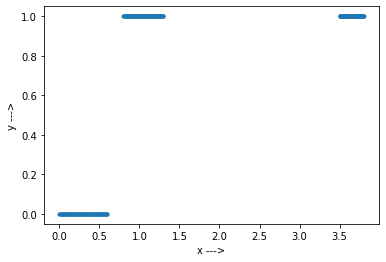

In [9]:
## Write your code here
x1 = np.linspace(0,0.6,100)
y1 = np.zeros(x1.shape)
x2 = np.linspace(0.8,1.3,100)
y2 = np.ones(x2.shape)
x3 = np.linspace(3.5,3.8,100)
y3 = np.ones(x3.shape)

x = np.concatenate((x1, x2, x3))
y = np.concatenate((y1, y2, y3))

plt.figure()
plt.plot(x.T, y,'.')
plt.xlabel('x --->')
plt.ylabel('y --->')
plt.show()


(1, 300)
(2, 300)
Optimal Weights using Matrix inversion,
 w = 
 [[0.3017071 ]
 [0.21897574]]
Optimal Weights using Gradient Descent,
 w = 
 [[0.28946281]
 [0.22353251]]


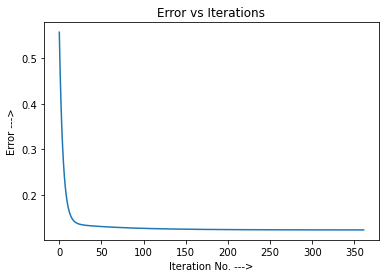

In [10]:
## Write your code here
x_new = x[:, np.newaxis].T                    # FVs are vertical 
print(x_new.shape)
x_ones = np.ones((1, x_new.shape[1]))
x_aug = np.concatenate((x_ones, x_new))
print(x_aug.shape)
y_new = y[:, np.newaxis]

linreg = linearRegression()
w = linreg.mat_inv(y_new, x_aug)
print("Optimal Weights using Matrix inversion,\n w = \n", w)

linreg = linearRegression()
lr = 0.01
w, err_list = linreg.Regression_grad_des(x_aug, y_new, lr)
print("Optimal Weights using Gradient Descent,\n w = \n", w)

plt.figure()
plt.title('Error vs Iterations')
plt.xlabel('Iteration No. --->')
plt.ylabel('Error --->')
plt.plot(err_list)
plt.show()

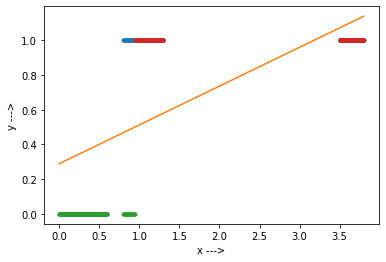

In [11]:
y_out = x_aug.T @ w

class_0 = []
class_1 = []
for i in range(len(x.T)):
    if y_out[i]>=0.5:
        class_1.append(x.T[i])
    else:
        class_0.append(x.T[i])

plt.figure()
plt.plot(x.T, y,'.')
plt.plot(x.T, y_out)
plt.plot(class_0, np.zeros(len(class_0)), '.')
plt.plot(class_1, np.ones(len(class_1)), '.')
plt.xlabel('x --->')
plt.ylabel('y --->')
plt.show()

# Logistic regression

  Error Surface (Comparison between Logistic Loss and Mean Squared Error)

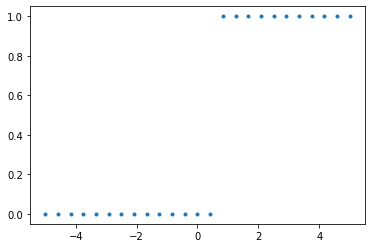

In [12]:
import numpy as np
import matplotlib.pyplot as plt


x=np.linspace(-5,5,25)
y=np.zeros(x.shape)
y[np.where(x>0.7314)]=1

plt.plot(x,y,'.')

1. MSE=$\frac{1}{2N}\sum_{i=1}^{N}(y^{p}_{i}-y_{i})^2$, where $y^{p}=\frac{1}{1+e^{-w^{T}x}}$
2. Logistic loss=$-\frac{1}{N}\sum_{i=1}^{N}y_{i}log(y^{p}_{i})+(1-y_{i})log(1-y_{i}^{p})$

In [13]:
# search space (only w1 is searched, where as w0 is fixed)
w1_in=10/(x[1]-x[0])
w0=-w1_in*0.7314
w1=np.linspace(-w1_in,4*w1_in,100)


cost_fn_mse=[]
cost_fn_logis=[]
for i in range(w1.shape[0]):

  # Compute Mean square error and logistic loss using cost function
  # Write your code here 
  z = w0 + w1[i]*x
  yp = 1/(1 + np.exp(-z))
  
  cost_mse = np.sum((yp - y)**2)/(2*x.shape[0])
  cost_fn_mse.append(cost_mse)

  dc = 10**(-10)
  cost_logis = -np.sum(y*np.log(yp+dc) + (1-y)*np.log(1-yp+dc))/(x.shape[0])
  cost_fn_logis.append(cost_logis)


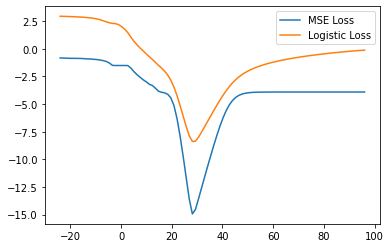

In [14]:
# Plotting of error surface
plt.figure()
plt.plot(w1,np.log(cost_fn_mse),label='MSE Loss')
plt.plot(w1,np.log(cost_fn_logis),label = 'Logistic Loss')
plt.legend()

**Solving the Outlier Issue**

  Generate the Data as shown in the figure

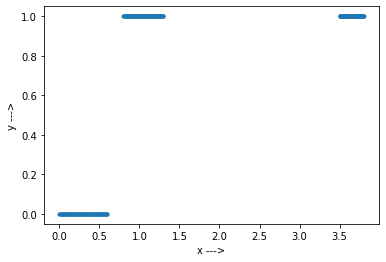

In [15]:
## Write your Code here
x1 = np.linspace(0,0.6,100)
y1 = np.zeros(x1.shape)
x2 = np.linspace(0.8,1.3,100)
y2 = np.ones(x2.shape)
x3 = np.linspace(3.5,3.8,100)
y3 = np.ones(x3.shape)

x = np.concatenate((x1, x2, x3))
y = np.concatenate((y1, y2, y3))

plt.figure()
plt.plot(x.T, y,'.')
plt.xlabel('x --->')
plt.ylabel('y --->')
plt.show()

Define a Logistic Regression class

Recall:
1. MSE=$\frac{1}{2N}\sum_{i=1}^{N}(y^{p}_{i}-y_{i})^2$, where $y^{p}=\frac{1}{1+e^{-w^{T}x}}$
2. Logistic loss=$-\frac{1}{N}\sum_{i=1}^{N} (y_{i}log(y^{p}_{i})+(1-y_{i})log(1-y_{i}^{p}))$

In [16]:
class logis_regression:
  # Constructor
  def __init__(self, name='reg'):
    self.name = name  # Create an instance variable

  def logis(self,x,w_old):
    # write code here
    op = 1/(1 + np.exp(-(x.T @ w_old)))
    return op

  def grad_update(self,w_old,lr,y,x):
    # write code here
    w = w_old + (lr/x.shape[1])*(x @ (y - (self.logis(x, w_old))))
    return w

  def error(self,w,y,x):
    g = self.logis(x, w)
    return -np.mean(y*np.log(g + 10**(-10)) + (1-y)*np.log(1-g + 10**(-10)))

  def Regression_grad_des(self,x,y,lr):
    err_arr = []
    w_init = np.zeros((x.shape[0],1))
    w_prev = w_init
    w_curr = w_init
    for i in range(1000):     
      w_curr = self.grad_update(w_curr, lr, y, x)
      # print(w_curr)
      err = self.error(w_curr, y, x)
      err_prev = self.error(w_prev, y, x)
      # print("err = ", err)
      # print("err_arr = ", err_arr)
      err_arr.append(err)
      dev=np.abs(err - err_prev)
      w_prev = w_curr
      if dev<=10**(-20):
        break
    w_pred = w_curr
    err = err_arr
    # err.pop(0)
    return w_pred,err

Augment the data and fit the curve by obtaining optimal weights (Using Gradient Descent)

In [17]:
## Write your code here

x_new = x[:, np.newaxis].T                    # FVs are vertical 
# print(x_new.shape)
x_ones = np.ones((1, x_new.shape[1]))
x_aug = np.concatenate((x_ones, x_new))
# print(x_aug.shape)
y_new = y[:, np.newaxis]

reg = logis_regression()
lr = 0.1
w, err_list = reg.Regression_grad_des(x_aug, y_new, lr)
print("Optimal Weights using Gradient Descent,\n w = \n", w)

Optimal Weights using Gradient Descent,
 w = 
 [[-2.92987302]
 [ 4.56269645]]


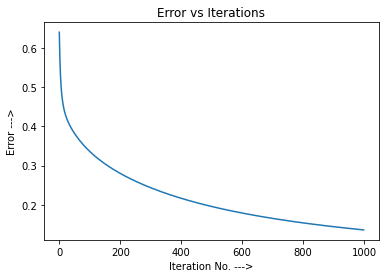

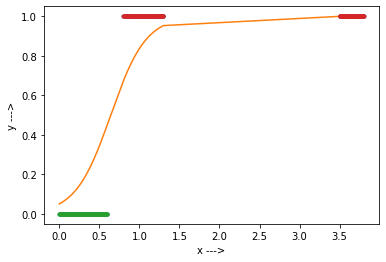

In [18]:
plt.figure()
plt.title('Error vs Iterations')
plt.xlabel('Iteration No. --->')
plt.ylabel('Error --->')
plt.plot(err_list)
plt.show()

y_out = 1/(1 + np.exp(-(x_aug.T @ w)))

class_0 = []
class_1 = []
for i in range(len(x.T)):
    if y_out[i]>=0.5:
        class_1.append(x.T[i])
    else:
        class_0.append(x.T[i])

plt.figure()
plt.plot(x.T, y,'.')
plt.plot(x.T, y_out)
plt.plot(class_0, np.zeros(len(class_0)), '.')
plt.plot(class_1, np.ones(len(class_1)), '.')
plt.xlabel('x --->')
plt.ylabel('y --->')
plt.show()

# Classification of circularly separated data using logistic regression



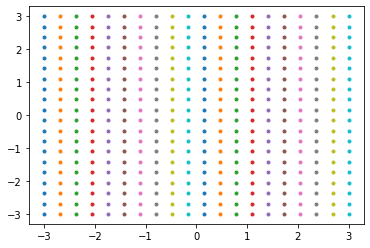

In [32]:
x1=np.linspace(-3,3,20)
x2=np.linspace(-3,3,20)

x11,x22=np.meshgrid(x1,x2)
plt.plot(x11,x22,'.')
plt.show()

  Using the above data generate circular data

(400, 2)


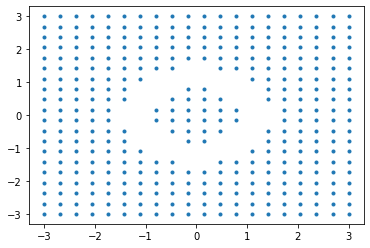

In [33]:
# Write code here
x1 = x11.flatten()
x1 = x1[:, np.newaxis]
x2 = x22.flatten()          # 2d -> 1d
x2 = x2[:, np.newaxis]
x = np.concatenate((x1, x2), axis=1) # create all ordered pairs 
print(x.shape)

in_pt_ind = np.where((x[:,0]**2 + x[:,1]**2) <= 0.8)
out_pt_ind = np.where((x[:,0]**2 + x[:,1]**2) >= 2.2)
# print(in_pt_ind[0])
x_in = x[in_pt_ind[0], :]
x_out = x[out_pt_ind[0], :]

x = np.concatenate((x_in, x_out)) # our dataset

plt.figure()
plt.plot(x[:,0], x[:,1], '.')
plt.show()



As in case of circularly separated data, the boundary is nonlinear, so squared feature is taken.

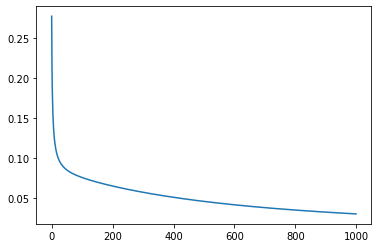

In [34]:
# perform logistic regression
y_in = np.zeros((x_in.shape[0]))
y_out = np.ones((x_out.shape[0]))
y = np.concatenate((y_in, y_out))
y_new = y[:, np.newaxis]

x_sq = (x.T)**2
x_ones = np.ones((1, x.shape[0]))
x_aug = np.concatenate((x_ones, x_sq), axis=0)

reg = logis_regression()
lr = 0.1
w_pred,err = reg.Regression_grad_des(x_aug, y_new, lr)
plt.figure()
plt.plot(err)
plt.show()

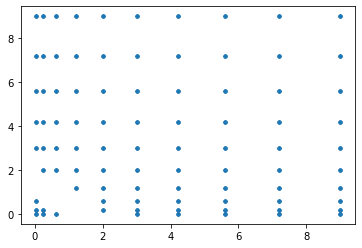

In [36]:
plt.figure()
# print(x_sq)
plt.plot(x_sq[0, :], x_sq[1, :], '.')
y_t = reg.logis(x_aug,w_pred)
in_p = np.where(y_t < 0.5)
out_p = np.where(y_t >= 0.5)
x_in_p = x[in_p[0],:]
x_out_p = x[out_p[0],:]
y_o = 1/(1 + np.exp(-(x_aug.T @ w_pred)))

# plt.plot(x_sq.T, y_o)
# plt.plot(x_in_p[:,0], x_in_p[:,1], '.')
# plt.plot(x_out_p[:,0], x_out_p[:,1], '.')
plt.show()

Plot classification using 0.5 as threshold

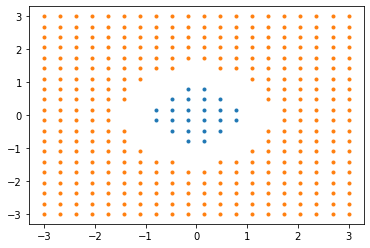

In [23]:
#write code here
y_pred = reg.logis(x_aug,w_pred)

in_pred = np.where(y_pred < 0.5)
out_pred = np.where(y_pred >= 0.5)

x_in_pred = x[in_pred[0],:]
x_out_pred = x[out_pred[0],:]

plt.figure()
plt.plot(x_in_pred[:,0], x_in_pred[:,1], '.')
plt.plot(x_out_pred[:,0], x_out_pred[:,1], '.')
plt.show()

# Multiclass logistic regression

1. Generate 1D data with 3 classes


(300,)


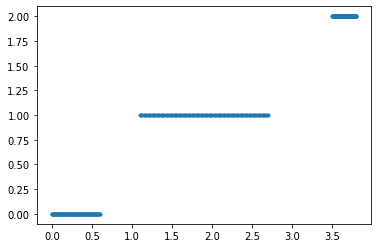

In [24]:
## Write your code here

import numpy as np
import matplotlib.pyplot as plt

x1=np.linspace(0,0.6,100)
x2=np.linspace(1.1,2.7,100)
x3=np.linspace(3.5,3.8,100)

x=np.concatenate((x1,x2,x3))
print(x.shape)

y1=np.zeros(x1.shape)
y2=np.ones(x2.shape)
y3=np.tile([2],x3.shape)

y=np.concatenate((y1,y2,y3))

plt.figure()
plt.plot(x,y,'.')


In [25]:
# def data_transform(X,degree): 
#   X_new=[]      
#   for i in range(degree +1):
#     # write code here to generate a polynomial

def data_transform(X,degree): 
  X_new=[]      
  for i in range(degree +1):
    X_new.append(X**i)              
  X_new = np.concatenate(X_new)  
  return X_new

x_aug=data_transform(x[np.newaxis,:],2)
# x_aug

In [26]:
# plot for classification
def plot_op(x,y_pred):

  ind0,_=np.where(y_pred<0.5)
  ind1,_=np.where(y_pred>=0.5)
  x0=x[ind0,:]
  x1=x[ind1,:]
  plt.plot(x0,np.zeros((x0).shape),'o',color='y')
  plt.plot(x1,np.ones((x1).shape),'x',color='r')
  

In [27]:
def IsClassNum(num, y):
    yi = np.zeros(y.shape)
    for i in range(len(y)):
        if y[i] == num:
            yi[i] = 0
        else:
            yi[i] = 1
    return yi

Using the above function for plotting, plot the curve using different configurations

[[-3.33922596]
 [ 0.74779595]
 [ 2.84819221]]


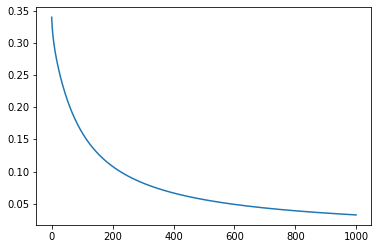

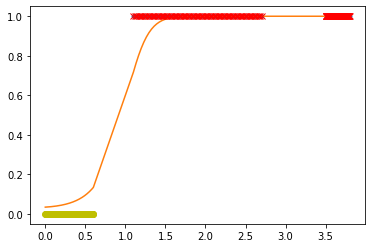

In [28]:
# take class 0 as '0' and other to '1'
## Write your code here
y0 = IsClassNum(0, y)
y0_new = y0[:,np.newaxis]

reg0 = logis_regression()
lr = 0.1

w_pred, err = reg.Regression_grad_des(x_aug, y0_new, lr)
print(w_pred)

plt.figure()
plt.plot(err)
plt.show()

y0_pred = reg.logis(x_aug, w_pred)

plt.figure()
plt.plot(x, y0_new, '.')
plt.plot(x, y0_pred[:,0])
plot_op(x[:,np.newaxis], y0_pred)
plt.show()

[[ 3.04807476]
 [-5.26692489]
 [ 1.43081929]]


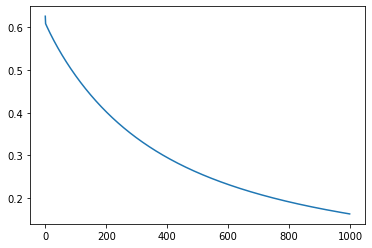

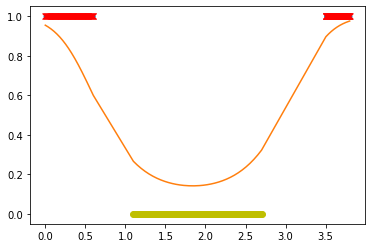

In [29]:
# take class 1 as '0' and other to '1'
## Write your code here
y1 = IsClassNum(1, y)
y1_new = y1[:,np.newaxis]

reg1 = logis_regression()
lr = 0.1

w_pred, err = reg.Regression_grad_des(x_aug, y1_new, lr)
print(w_pred)

plt.figure()
plt.plot(err)
plt.show()

y1_pred = reg.logis(x_aug, w_pred)

plt.figure()
plt.plot(x, y1_new, '.')
plt.plot(x, y1_pred[:,0])
plot_op(x[:,np.newaxis], y1_pred)
plt.show()


[[ 3.86508203]
 [ 2.85058119]
 [-1.38961688]]


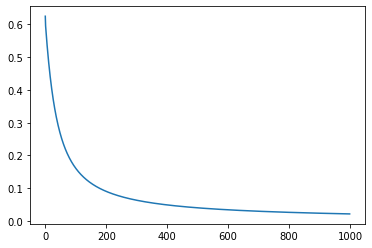

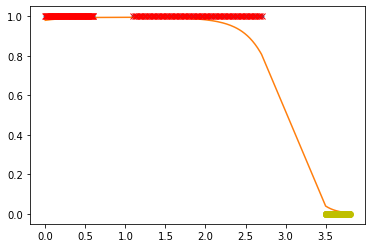

In [30]:
# Take class 2 as '0' and other to '1'
## Write your code here
y2 = IsClassNum(2, y)
y2_new = y2[:,np.newaxis]

reg2 = logis_regression()
lr = 0.1

w_pred, err = reg.Regression_grad_des(x_aug, y2_new, lr)
print(w_pred)

plt.figure()
plt.plot(err)
plt.show()

y2_pred = reg.logis(x_aug, w_pred)

plt.figure()
plt.plot(x, y2_new, '.')
plt.plot(x, y2_pred[:,0])
plot_op(x[:,np.newaxis], y2_pred)
plt.show()

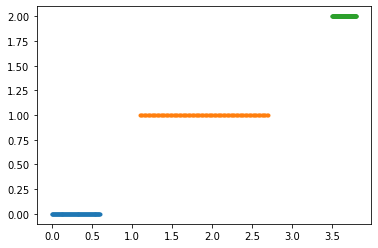

In [31]:
# final classification
## Write your code here
index_pred0, _ = np.where(y0_pred<0.5)
x_0 = x[index_pred0]
index_pred1, _ = np.where(y1_pred<0.5)
x_1 = x[index_pred1]
index_pred2, _ = np.where(y2_pred<0.5)
x_2 = x[index_pred2]

plt.figure()
plt.plot(x_0, np.zeros(x_0.shape), '.')
plt.plot(x_1, np.ones(x_1.shape), '.')
plt.plot(x_2, np.tile([2], x_2.shape), '.')
plt.show()

